In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("heart.csv")
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [2]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [13]:
data.isnull().sum()
data.fillna(data.mean(numeric_only=True), inplace=True)
print(data.isnull().sum())

age                 0
sex                 0
cp                  0
trestbps            0
chol                0
fbs                 0
restecg             0
thalach             0
exang               0
oldpeak             0
slope               0
ca                  0
thal                0
target              0
detected_disease    0
risk_level          0
dtype: int64


In [5]:
def detect_heart_disease(row):
    if row['chol'] > 240 or row['trestbps'] > 140:
        return 1
    else:
        return 0

data['detected_disease'] = data.apply(detect_heart_disease, axis=1)
data[['age', 'chol', 'trestbps', 'detected_disease']].head()


,age,chol,trestbps,detected_disease
0,52,212,125,0
1,53,203,140,0
2,70,174,145,1
3,61,203,148,1
4,62,294,138,1


In [6]:
def risk_level(row):
    if row['detected_disease'] == 1 and row['chol'] > 250:
        return "High Risk"
    else:
        return "Low Risk"

data['risk_level'] = data.apply(risk_level, axis=1)
data[['age', 'chol', 'risk_level']].head()


,age,chol,risk_level
0,52,212,Low Risk
1,53,203,Low Risk
2,70,174,Low Risk
3,61,203,Low Risk
4,62,294,High Risk


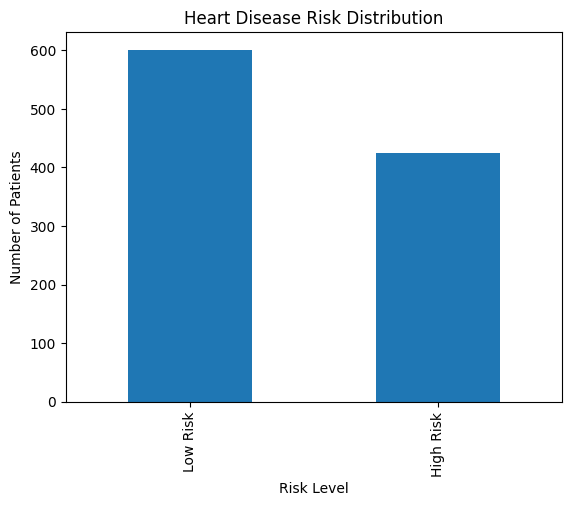

In [8]:
data['risk_level'].value_counts().plot(kind='bar')
plt.title("Heart Disease Risk Distribution")
plt.xlabel("Risk Level")
plt.ylabel("Number of Patients")
plt.show()

In [9]:
data.loc[0]

age                       52
sex                        1
cp                         0
trestbps                 125
chol                     212
fbs                        0
restecg                    1
thalach                  168
exang                      0
oldpeak                  1.0
slope                      2
ca                         2
thal                       3
target                     0
detected_disease           0
risk_level          Low Risk
Name: 0, dtype: object